In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
conda install -c conda-forge scikit-plot

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install yfinance
!pip install investpy
!pip install pykrx
!pip install seaborn
!pip install workalendar
!pip install --upgrade finance-datareader

You should consider upgrading via the 'c:\users\song\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\song\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\song\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\song\anaconda3\python.exe -m pip install --upgrade pip' command.


  Using cached workalendar-14.3.0-py3-none-any.whl (187 kB)
  Using cached lunardate-0.2.0-py3-none-any.whl (5.6 kB)
  Using cached pyCalverter-1.6.1.tar.gz (3.5 kB)
  Using cached pyluach-1.2.1-py3-none-any.whl (14 kB)

You should consider upgrading via the 'c:\users\song\anaconda3\python.exe -m pip install --upgrade pip' command.



  Using cached jplephem-2.15.tar.gz (40 kB)
  Using cached skyfield_data-3.0.0-py2.py3-none-any.whl (16.9 MB)
  Created wheel for pyCalverter: filename=pyCalverter-1.6.1-py3-none-any.whl size=4204 sha256=bd1feef9c8c8c070a2f0f91028ea1bf4fd1cb7a109e2ed4bacc115551cf0777e
  Stored in directory: c:\users\song\appdata\local\pip\cache\wheels\f4\27\ed\5623e00b982af620623c8912481a48ba32e2928134a922649a
  Created wheel for skyfield: filename=skyfield-1.36-py3-none-any.whl size=428762 sha256=1b46150f8f0d95dd67ff292efa44425b81a55c41e74de4e8f5267e2fc9b0d5da
  Stored in directory: c:\users\song\appdata\local\pip\cache\wheels\7d\3c\c7\f394874b0ab9a7808c9c0e29ca1663bc4525155252f62fa1c8
  Created wheel for jplephem: filename=jplephem-2.15-py3-none-any.whl size=46021 sha256=61620e593d51018d607de46dcbf2f2d91194337351b5f7f019995c7dec82fe42
  Stored in directory: c:\users\song\appdata\local\pip\cache\wheels\e8\73\f7\561e2b3f7e90f3b7d0beb8fa3487039076b166f25b61eacdc3
Successfully built pyCalverter skyfield

You should consider upgrading via the 'c:\users\song\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import yfinance as yf # yahoo finance API    # pip install yfinance
import investpy # investing.com API          # pip install investpy
from pykrx import stock # krx API           # pip instasll pykrx
import talib as ta # 기술적 분석 (보조지표)
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [126]:
# 크롤링 start_date, end_date
start_date='2017-01-01'
#input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2018-01-01 : ')
end_date='2021-01-13'
#input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2020-10-13 : ')

In [127]:
# 데이터 수집기간 입력
# yahoo finance 양식, ex) yyyy-mm-dd
#start_date = '2018-01-01'
#end_date = '2020-10-13'

# investing.com 양식, ex) dd/mm/yyyy
start_date_ = start_date[8:] + '/' + start_date[5:7] + '/' + start_date[:4]
end_date_ = end_date[8:] + '/' + end_date[5:7] + '/' + end_date[:4]

# krx 양식 ex) yyyymmdd
start_date__ = start_date[0:4] + start_date[5:7] + start_date[8:10]
end_date__ = end_date[0:4] + end_date[5:7] + end_date[8:10]

In [128]:
# 주요 3개국 대비 원 환율

# 달러/원
exchange_rate_usd_ = investpy.get_currency_cross_historical_data(currency_cross='USD/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_usd_.columns = ['exchange_rate_usd_Open', 'exchange_rate_usd_High', 'exchange_rate_usd_Low', 'exchange_rate_usd_Close', 'exchange_rate_usd_Currency']
exchange_rate_usd_ = exchange_rate_usd_.drop(['exchange_rate_usd_Open','exchange_rate_usd_High','exchange_rate_usd_Low','exchange_rate_usd_Currency'], axis=1)

# S&P 500
snp_500_ = yf.download("^GSPC", start=start_date, end=end_date)
snp_500_.columns = ['snp_500_Open','snp_500_High','snp_500_Low','snp_500_Close','snp_500_Adj Close','snp_500_Volume']
snp_500_ = snp_500_.drop(['snp_500_Open','snp_500_High','snp_500_Low','snp_500_Adj Close','snp_500_Volume'], axis=1)

# NASDAQ
nasdaq_ = yf.download("^IXIC", start=start_date, end=end_date)
nasdaq_.columns = ['nasdaq_Open','nasdaq_High','nasdaq_Low','nasdaq_Close','nasdaq_Adj Close','nasdaq_Volume']
nasdaq_ = nasdaq_.drop(['nasdaq_Open','nasdaq_High','nasdaq_Low','nasdaq_Adj Close','nasdaq_Volume'], axis=1)

# Russell 2000
russell_2000_ = yf.download("^RUT", start=start_date, end=end_date)
russell_2000_.columns = ['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Close','russell_2000_Adj Close','russell_2000_Volume']
russell_2000_ = russell_2000_.drop(['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Adj Close','russell_2000_Volume'], axis=1)

# 삼성 차트 데이터
sam_ = stock.get_market_ohlcv_by_date(start_date__, end_date__, "005930")
sam_.columns = ['Open','High','Low','Close','Volume']
model_samsung = sam_.copy()

# 3) MACD 이동평균수렴확산 (단기(EMA12)와 장기(EMA26) EMA로 모멘텀을 추정)
macd, macdsignal9, macdhist = ta.MACD(model_samsung.Close, fastperiod=12, slowperiod=26, signalperiod=9)
model_samsung['macd'] = macd
model_samsung['macdsignal9'] = macdsignal9
model_samsung['macdhist'] = macdhist

MSCI_KR = fdr.DataReader('156080', start_date,end_date) #MSCI KOREA
MSCI_KR = MSCI_KR.drop(['Open','High','Low', 'Change','Volume'], axis=1) 
MSCI_KR.columns = ['MSCI_KR']

# HANG SENG
hang_seng_ = yf.download("^HSI", start=start_date, end=end_date)
hang_seng_.columns = ['hang_seng_Open','hang_seng_High','hang_seng_Low','hang_seng_Close','hang_seng_Adj Close','hang_seng_Volume']
hang_seng_ = hang_seng_.drop(['hang_seng_Open','hang_seng_High','hang_seng_Low','hang_seng_Adj Close','hang_seng_Volume'], axis=1)

# 미국 국채 수익률 (5년)
treasury_5y_ = yf.download("^FVX", start=start_date, end=end_date)
treasury_5y_.columns = ['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Close','treasury_5y_Adj Close','treasury_5y_Volume']
treasury_5y_ = treasury_5y_.drop(['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Adj Close','treasury_5y_Volume'], axis=1)

# 미국 국채 수익률 (10년)
treasury_10y_ = yf.download("^TNX", start=start_date, end=end_date)
treasury_10y_.columns = ['treasury_10y_Open','treasury_10y_High','treasury_10y_Low','treasury_10y_Close','treasury_10y_Adj Close','treasury_10y_Volume']
treasury_10y_ = treasury_10y_.drop(['treasury_10y_Open','treasury_10y_High','treasury_10y_Low','treasury_10y_Adj Close','treasury_10y_Volume'], axis=1)

# 미국 국채 수익률 (30년)
treasury_30y_ = yf.download("^TYX", start=start_date, end=end_date)
treasury_30y_.columns = ['treasury_30y_Open','treasury_30y_High','treasury_30y_Low','treasury_30y_Close','treasury_30y_Adj Close','treasury_30y_Volume']
treasury_30y_ = treasury_30y_.drop(['treasury_30y_Open','treasury_30y_High','treasury_30y_Low','treasury_30y_Adj Close','treasury_30y_Volume'], axis=1)

# [*에너지*]
# WTI유 시세
crude_oil_ = yf.download("CL=F", start=start_date, end=end_date)
crude_oil_.columns = ['crude_oil_Open','crude_oil_High','crude_oil_Low','crude_oil_Close','crude_oil_Adj Close','crude_oil_Volume']
crude_oil_ = crude_oil_.drop(['crude_oil_Open','crude_oil_High','crude_oil_Low','crude_oil_Adj Close','crude_oil_Volume'], axis=1)

# 브렌트유 시세
brent_crude_oil_ = yf.download("BZ=F", start=start_date, end=end_date)
brent_crude_oil_.columns = ['brent_crude_oil_Open','brent_crude_oil_High','brent_crude_oil_Low','brent_crude_oil_Close','brent_crude_oil_Adj Close','brent_crude_oil_Volume']
brent_crude_oil_ = brent_crude_oil_.drop(['brent_crude_oil_Open','brent_crude_oil_High','brent_crude_oil_Low','brent_crude_oil_Adj Close','brent_crude_oil_Volume'], axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [129]:
model_samsung

,Open,High,Low,Close,Volume,macd,macdsignal9,macdhist
날짜,,,,,,,,
2017-01-02,35980,36240,35880,36100,93012,NaN,NaN,NaN
2017-01-03,36280,36620,36020,36480,147153,NaN,NaN,NaN
2017-01-04,36500,36520,36100,36160,159435,NaN,NaN,NaN
2017-01-05,36060,36060,35540,35560,219349,NaN,NaN,NaN
2017-01-06,36180,36440,36040,36200,177619,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-01-07,82800,84200,82700,82900,32644642,3915.864554,3383.641109,532.223444
2021-01-08,83300,90000,83000,88800,59013307,4384.500594,3583.813006,800.687588
2021-01-11,90000,96800,89500,91000,90306177,4877.198339,3842.490073,1034.708266


In [130]:
# 삼성전자우 차트 데이터
df1 = stock.get_market_ohlcv_by_date(start_date__, end_date__, "005935")
df1 = df1.drop(['시가','고가','저가','거래량'],axis=1)
df1.columns = ['Close']
model_samsung['SAMSUNGWO'] = df1

# 통신주 -SK텔레콤
df2 = stock.get_market_ohlcv_by_date(start_date__, end_date__, "017670")
df2 = df2.drop(['시가','고가','저가','거래량'],axis=1)
df2.columns = ['Close']
model_samsung['SKT'] = df2

# 건설주 - 현대건설
df3 = stock.get_market_ohlcv_by_date(start_date__, end_date__, "000720")
df3 = df3.drop(['시가','고가','저가','거래량'],axis=1)
df3.columns = ['Close']
model_samsung['HYUNDAI'] = df3

# 자동차 - 현대차
df4 = stock.get_market_ohlcv_by_date(start_date__, end_date__, "005380")
df4 = df4.drop(['시가','고가','저가','거래량'],axis=1)
df4.columns = ['Close']
model_samsung['HYUNCAR'] = df4

# 식품 오리온
df5 = stock.get_market_ohlcv_by_date(start_date__, end_date__, "271560")
df5 = df5.drop(['시가','고가','저가','거래량'],axis=1)
df5.columns = ['Close']
model_samsung['ORION'] = df5

# 증권 미래에셋대우
df6 = stock.get_market_ohlcv_by_date(start_date__, end_date__, "006800")
df6 = df6.drop(['시가','고가','저가','거래량'],axis=1)
df6.columns = ['Close']
model_samsung['MIRAE'] = df6

# 호텔 강원랜드
df7 = stock.get_market_ohlcv_by_date(start_date__, end_date__, "035250")
df7 = df7.drop(['시가','고가','저가','거래량'],axis=1)
df7.columns = ['Close']
model_samsung['KANGLAND'] = df7

# 은행 KB금융
df8 = stock.get_market_ohlcv_by_date(start_date__, end_date__, "105560")
df8 = df8.drop(['시가','고가','저가','거래량'],axis=1)
df8.columns = ['Close']
model_samsung['KBBANK'] = df8

# 인터넷 네이버
df9 = stock.get_market_ohlcv_by_date(start_date__, end_date__, "035420")
df9 = df9.drop(['시가','고가','저가','거래량'],axis=1)
df9.columns = ['Close']
model_samsung['NAVER'] = df9



In [131]:
#삼성전자 반도체 수혜주
# 유진테크 
df11 = stock.get_market_ohlcv_by_date(start_date__, end_date__, "084370")
df11 = df11.drop(['시가','고가','저가','거래량'],axis=1)
df11.columns = ['Close']
model_samsung['YUJINTEC'] = df11

# 네패스  
df12 = stock.get_market_ohlcv_by_date(start_date__, end_date__, "033640")
df12 = df12.drop(['시가','고가','저가','거래량'],axis=1)
df12.columns = ['Close']
model_samsung['NEPASS'] = df12

# DB하이텍 
df13 = stock.get_market_ohlcv_by_date(start_date__, end_date__, "000990")
df13 = df13.drop(['시가','고가','저가','거래량'],axis=1)
df13.columns = ['Close']
model_samsung['DBHIGH'] = df13

# 에스티아이  
df14 = stock.get_market_ohlcv_by_date(start_date__, end_date__, "039440")
df14 = df14.drop(['시가','고가','저가','거래량'],axis=1)
df14.columns = ['Close']
model_samsung['STI'] = df14

# 테크윙  
df15 = stock.get_market_ohlcv_by_date(start_date__, end_date__, "089030")
df15 = df15.drop(['시가','고가','저가','거래량'],axis=1)
df15.columns = ['Close']
model_samsung['TECWING'] = df15

# 테스나  
df16 = stock.get_market_ohlcv_by_date(start_date__, end_date__, "131970")
df16 = df16.drop(['시가','고가','저가','거래량'],axis=1)
df16.columns = ['Close']
model_samsung['TESNA'] = df16

In [132]:
model_samsung

,Open,High,Low,Close,Volume,macd,macdsignal9,macdhist,SAMSUNGWO,SKT,...,MIRAE,KANGLAND,KBBANK,NAVER,YUJINTEC,NEPASS,DBHIGH,STI,TECWING,TESNA
날짜,,,,,,,,,,,,,,,,,,,,,
2017-01-02,35980,36240,35880,36100,93012,NaN,NaN,NaN,28800,225500,...,7234,35700,42600,155621,17450,8250,16300,11107,14250,7623
2017-01-03,36280,36620,36020,36480,147153,NaN,NaN,NaN,28780,223000,...,7498,35550,43700,153618,17600,8300,17250,10967,14150,7548
2017-01-04,36500,36520,36100,36160,159435,NaN,NaN,NaN,28800,223000,...,7801,36300,44150,162230,16950,8790,17700,10640,13650,7673
2017-01-05,36060,36060,35540,35560,219349,NaN,NaN,NaN,28280,228000,...,7850,36650,42800,158425,16550,8810,17950,11060,13800,7371
2017-01-06,36180,36440,36040,36200,177619,NaN,NaN,NaN,28620,226500,...,7889,36050,42650,160027,16600,8840,18450,11013,13950,7120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-07,82800,84200,82700,82900,32644642,3915.864554,3383.641109,532.223444,74300,270000,...,10000,23400,46000,289500,33650,43200,54000,19000,22750,55400
2021-01-08,83300,90000,83000,88800,59013307,4384.500594,3583.813006,800.687588,77800,265000,...,10150,24000,46500,312000,34150,43700,54900,18900,22750,56100
2021-01-11,90000,96800,89500,91000,90306177,4877.198339,3842.490073,1034.708266,81000,257500,...,10500,23700,45900,309000,33300,43750,56200,19100,22600,55200


In [133]:
model_samsung['US'] = exchange_rate_usd_
model_samsung['SNP500'] = snp_500_
model_samsung['RUSSELL2000'] = russell_2000_
model_samsung['NASDAQ'] = nasdaq_
model_samsung['MSCI_KR'] = MSCI_KR
#model_samsung['SOXX'] = SOXX
#model_samsung['SMH'] = SMH
#model_samsung['SOXL'] = SOXL
#model_samsung['SOXS'] = SOXS
model_samsung['TREASURY_5Y']=treasury_5y_
model_samsung['TREASURY_10Y']=treasury_10y_
model_samsung['TREASURY_30Y']=treasury_30y_
#model_samsung['crude_oil'] = crude_oil_
#model_samsung['brent_crude_oil'] = brent_crude_oil_
model_samsung['hang_seng'] = hang_seng_

In [134]:
model_samsung = model_samsung.dropna() # 결측치가 있는 행 제거

In [135]:
model_samsung = model_samsung.drop(['Open','High','Low','Volume'],axis=1)

In [136]:
# 차트 비교분석을 위한 정규화
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(model_samsung)
output = min_max_scaler.transform(model_samsung)
output = pd.DataFrame(output, columns=model_samsung.columns, index=list(model_samsung.index.values))
print(output.head())

               Close      macd  macdsignal9  macdhist  SAMSUNGWO       SKT  \
2017-07-07  0.194398  0.487115     0.512279  0.500052   0.142235  0.733871   
2017-07-10  0.209337  0.492202     0.511866  0.521358   0.156479  0.725806   
2017-07-11  0.215686  0.498381     0.513097  0.541839   0.160831  0.762097   
2017-07-12  0.232120  0.510203     0.517071  0.575994   0.165974  0.737903   
2017-07-13  0.244818  0.524513     0.523868  0.611149   0.183778  0.741935   

             HYUNDAI   HYUNCAR     ORION     MIRAE  ...     TESNA        US  \
2017-07-07  0.491892  0.424603  0.047799  0.885842  ...  0.064579  0.453086   
2017-07-10  0.501802  0.407242  0.119497  0.885842  ...  0.070543  0.434009   
2017-07-11  0.498198  0.407242  0.054088  0.935939  ...  0.070049  0.432129   
2017-07-12  0.499099  0.412202  0.062893  0.917233  ...  0.064579  0.382372   
2017-07-13  0.493694  0.412202  0.038994  0.961051  ...  0.071036  0.380216   

              SNP500  RUSSELL2000    NASDAQ   MSCI_KR  T

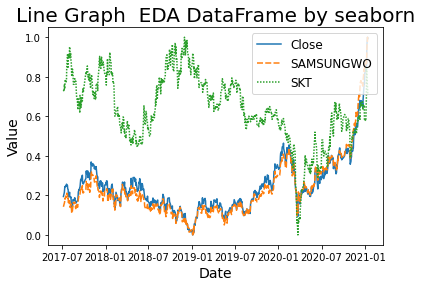

In [137]:
# Importing Libraries
##삼성주가와 삼성전자우, 통신 대장주 비교
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output[['Close', 'SAMSUNGWO', 'SKT']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

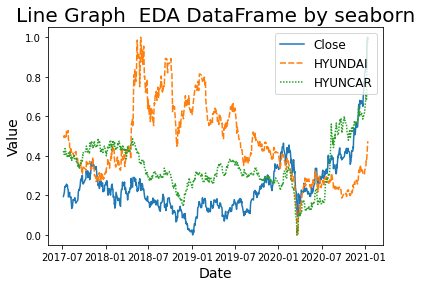

In [138]:
##삼성주가와 건설대장주, 자동차 대장주 비교
# 현대자동차와 살짝 비슷한 경향
ax = sns.lineplot(data=output[['Close', 'HYUNDAI', 'HYUNCAR']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

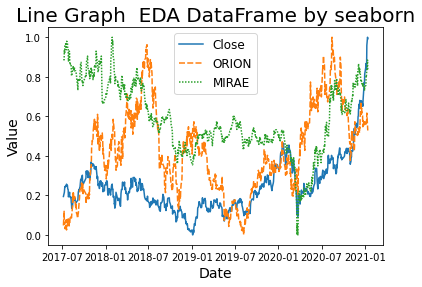

In [139]:
##삼성주가와 식품, 증권 비교
ax = sns.lineplot(data=output[['Close', 'ORION', 'MIRAE']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

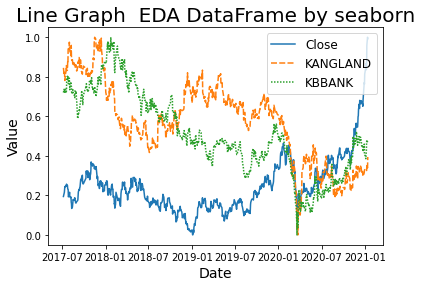

In [140]:
##삼성주가와 호텔대장주 은행 비교
ax = sns.lineplot(data=output[['Close', 'KANGLAND', 'KBBANK']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

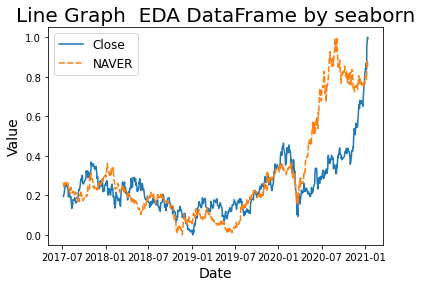

In [141]:
##삼성주가와 인터넷 대장주
# 뭔가 큰 영향 없어보임
ax = sns.lineplot(data=output[['Close', 'NAVER']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

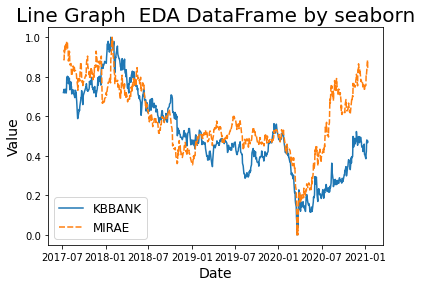

In [146]:
##금융권끼리 비교
# ...
ax = sns.lineplot(data=output[['KBBANK', 'MIRAE']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

In [ ]:
##삼성전자와 유진테크, 네패스
# 살짝 비슷한 느낌
ax = sns.lineplot(data=output[['Close', 'YUJINTEC', 'NEPASS']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

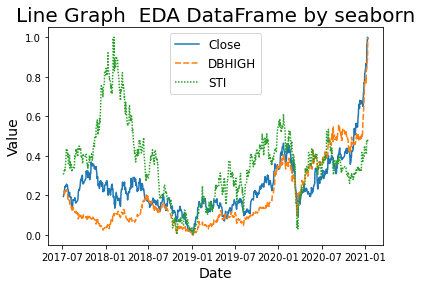

In [143]:
##삼성전자와 DB하이테크, 에스티아이
# DB하이테크가 비슷한 느낌
ax = sns.lineplot(data=output[['Close', 'DBHIGH', 'STI']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

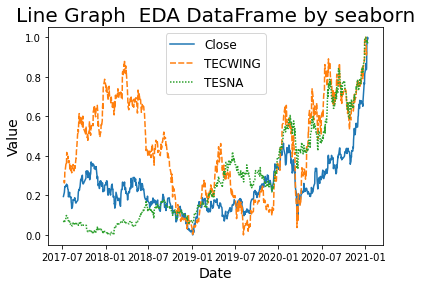

In [144]:
##삼성전자와 테크윙과 테스나
# 테스나가 조금 비슷
ax = sns.lineplot(data=output[['Close', 'TECWING', 'TESNA']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()